<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-AleRami89/blob/main/Semana7_Regresiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Semana 7 - Regresiones**


## **Maestría:** Inteligencia Artificial Aplicada
## **Alumno:** Alejandra Ramírez Romano A01793144
## **Fecha de entrega:** 09 de Noviembre de 2022

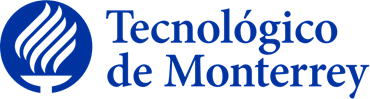

# Linear Models - Explicación en Clase


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [84]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [85]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [86]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

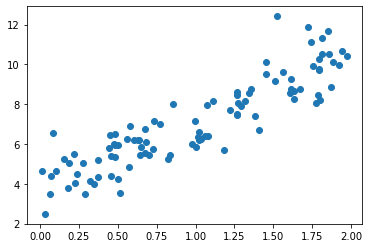

In [87]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [88]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [89]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [90]:
#X_fit[]

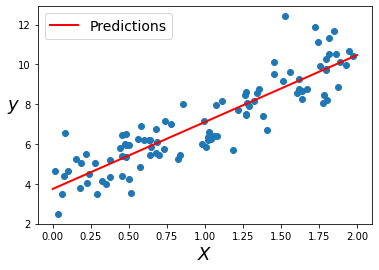

In [91]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [92]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [93]:
X_new.shape

(2, 1)

In [94]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [95]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [96]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [97]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

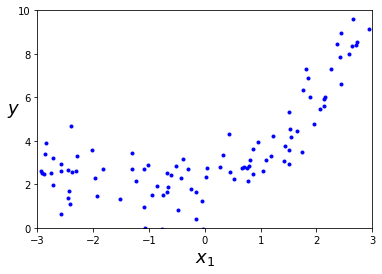

In [98]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [99]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [100]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [101]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [102]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [103]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [104]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

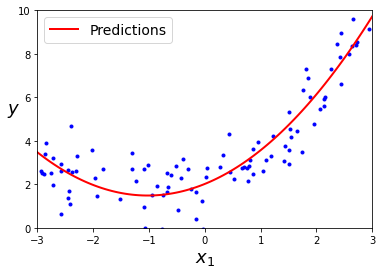

In [105]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1 -Costo en la industria de manufactura

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [106]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [107]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [108]:
len(X)

1000

In [109]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

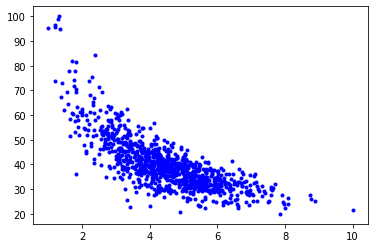

In [110]:
plt.plot(X,y,'b.')

#Regresion Lineal

In [111]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 300
number of training samples: 700


In [112]:
from sklearn.linear_model import LinearRegression

lre=LinearRegression() 

In [113]:
## Aqui entreno al modelo, le doy X train para que me calcule Y train
lre.fit(x_train, y_train)

LinearRegression()

In [114]:
#value of the intercept (a)
lre.intercept_

66.54024495702701

In [115]:
# value of the slope (b)
lre.coef_

array([-5.97986829])

The model with train data estimates:

$\hat{y} = -5.97X + 66.54$

In [116]:
#Luego hago predicciones con data de entrenamiento -Pruebo mi modelo con datos de entrenamiento
yhat_train = lre.predict(x_train)
yhat_train[0:5]

array([35.04441734, 35.37964761, 36.81223785, 33.32101541, 34.9384962 ])

In [117]:
#Luego hago predicciones con data de validacion - pruebo mi modelo con datos de validacion
yhat_test = lre.predict(x_test)
yhat_test[0:5]

array([39.86042656, 32.94475465, 40.91624257, 42.31234513, 45.29678439])

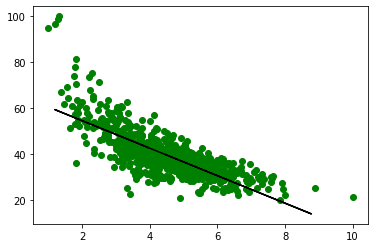

In [118]:
from matplotlib import pyplot as plt 

import seaborn as sns 

plt.scatter(x_train, y_train,color='g') 
plt.plot(x_test, yhat_test,color='k')
plt.show()

In [119]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

RLRsquare =r2_score(y_test, yhat_test)
RLMAE=  mean_absolute_error(y_test, yhat_test)
RLMAPE= mean_absolute_percentage_error(y_test, yhat_test)
RLRMSE = mean_squared_error (y_test, yhat_test,squared=True)


print(RLRsquare, ': R^2')
print(RLMAE, ': MAE Mean absolute error')
print(RLMAPE, ': MAPE mean absolute percentage error')
print(RLRMSE, ': RMSE root mean squared error')


0.5733759051176386 : R^2
5.102686032375684 : MAE Mean absolute error
0.1282992506825898 : MAPE mean absolute percentage error
52.64363355549199 : RMSE root mean squared error


#Regresion Polinomial

In [120]:
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.preprocessing import PolynomialFeatures

In [121]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 6
    height = 5
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([0, 100])
    plt.ylabel('Price')
    plt.legend()

In [122]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train)
    x_test_pr = pr.fit_transform(x_test)
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train, x_test, y_train,y_test, poly, pr)


In [123]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [124]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 300
number of training samples: 700


In [125]:
pr = PolynomialFeatures(degree=3)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
pr

PolynomialFeatures(degree=3)

In [126]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)


LinearRegression()

In [127]:
poly.intercept_

107.65033192166231

In [128]:
poly.coef_

array([  0.        , -30.96438387,   4.44261447,  -0.22936049])

In [129]:
yhat = poly.predict(x_test_pr)


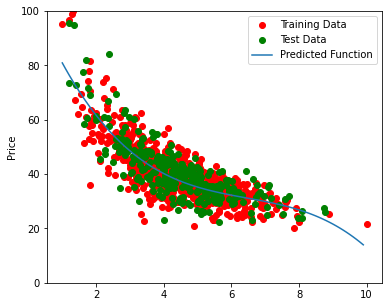

In [130]:
PollyPlot(x_train, x_test, y_train, y_test, poly,pr)

In [131]:

PolyRsquare =r2_score(y_test, yhat)
PolyMAE=  mean_absolute_error(y_test, yhat)
PolyMAPE= mean_absolute_percentage_error(y_test, yhat)
PolyRMSE = mean_squared_error (y_test, yhat,squared=True)


print(PolyRsquare, ': R^2')
print(PolyMAE, ': MAE Mean absolute error')
print(PolyMAPE, ': MAPE mean absolute percentage error')
print(PolyRMSE, ': RMSE root mean squared error')


0.7107533398311705 : R^2
4.497721019064544 : MAE Mean absolute error
0.11264368755719056 : MAPE mean absolute percentage error
35.691831210978656 : RMSE root mean squared error


#Regresión con Ridge

In [132]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

In [133]:
parameters1= [{'alpha': [0.001,0.005,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.005, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [134]:
RR=Ridge()
RR

Ridge()

In [135]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [136]:
Grid1.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.005, 0.1, 1, 10, 100, 1000, 10000,
                                    100000, 100000]}])

In [137]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10)

In [138]:
pr = PolynomialFeatures(degree=3)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
pr

PolynomialFeatures(degree=3)

In [139]:
RidgeModel=Ridge(alpha=10)

In [140]:
RidgeModel.fit(x_train_pr, y_train)

Ridge(alpha=10)

In [141]:
RidgeModel.intercept_

79.74052620631434

In [142]:
RidgeModel.coef_

array([  0.        , -11.60376535,   0.37859275,   0.03289299])

In [143]:
yhat = RidgeModel.predict(x_test_pr)

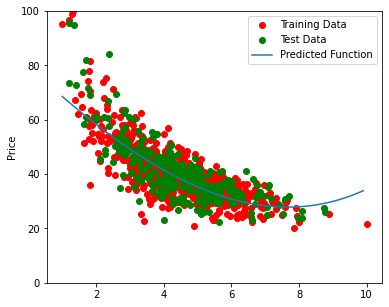

In [144]:
PollyPlot(x_train, x_test, y_train, y_test, RidgeModel,pr)

In [145]:

RidgeRsquare =r2_score(y_test, yhat)
RidgeMAE=  mean_absolute_error(y_test, yhat)
RidgeMAPE= mean_absolute_percentage_error(y_test, yhat)
RidgeRMSE = mean_squared_error (y_test, yhat,squared=True)


print(RidgeRsquare, ': R^2')
print(RidgeMAE, ': MAE Mean absolute error')
print(RidgeMAPE, ': MAPE mean absolute percentage error')
print(RidgeRMSE, ': RMSE root mean squared error')

0.6664399091465326 : R^2
4.654216888618585 : MAE Mean absolute error
0.11564028770709191 : MAPE mean absolute percentage error
41.15992369457835 : RMSE root mean squared error


#Regresion con Lasso

In [146]:
parameters1= [{'alpha': [0.001,0.01,0.1,0.2,0.4,1]}]
parameters1

[{'alpha': [0.001, 0.01, 0.1, 0.2, 0.4, 1]}]

In [147]:
LS=Lasso()
LS

Lasso()

In [148]:
Grid2 = GridSearchCV(LS, parameters1,cv=4)

In [149]:
Grid2.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 0.2, 0.4, 1]}])

In [150]:
BestLS=Grid2.best_estimator_
BestLS

Lasso(alpha=0.2)

In [151]:
pr = PolynomialFeatures(degree=3)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
pr

PolynomialFeatures(degree=3)

In [152]:
LassoModel=Lasso(alpha=0.2)

In [153]:
LassoModel.fit(x_train_pr, y_train)

Lasso(alpha=0.2)

In [154]:
LassoModel.intercept_

76.90753587844631

In [155]:
LassoModel.coef_

array([ 0.        , -9.72353228, -0.        ,  0.05635313])

In [156]:
yhat = LassoModel.predict(x_test_pr)

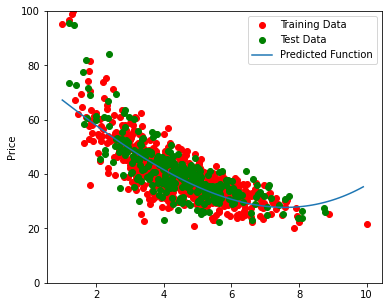

In [157]:
PollyPlot(x_train, x_test, y_train, y_test, LassoModel,pr)

In [158]:
LassoRsquare =r2_score(y_test, yhat)
LassoMAE=  mean_absolute_error(y_test, yhat)
LassoMAPE= mean_absolute_percentage_error(y_test, yhat)
LassoRMSE = mean_squared_error (y_test, yhat,squared=True)


print(LassoRsquare, ': R^2')
print(LassoMAE, ': MAE Mean absolute error')
print(LassoMAPE, ': MAPE mean absolute percentage error')
print(LassoRMSE, ': RMSE root mean squared error')

0.6589411323088574 : R^2
4.683138164464425 : MAE Mean absolute error
0.11624937599966581 : MAPE mean absolute percentage error
42.08524147360778 : RMSE root mean squared error


In [159]:
error_table = {    'Error' : ['Rsquare', 'MAE', 'MAPE','RSME'],
    'Linear' : [RLRsquare, RLMAE, RLMAPE,RLRMSE],
    'Polinomial' : [PolyRsquare, PolyMAE, PolyMAPE,PolyRMSE],
    'Ridge' : [RidgeRsquare, RidgeMAE, RidgeMAPE,RidgeRMSE],
    'Lasso' : [LassoRsquare, LassoMAE, LassoMAPE,LassoRMSE]}

error_table_df = pd.DataFrame(error_table)
error_table_df

,Error,Linear,Polinomial,Ridge,Lasso
0,Rsquare,0.573376,0.710753,0.666440,0.658941
1,MAE,5.102686,4.497721,4.654217,4.683138
2,MAPE,0.128299,0.112644,0.115640,0.116249
3,RSME,52.643634,35.691831,41.159924,42.085241


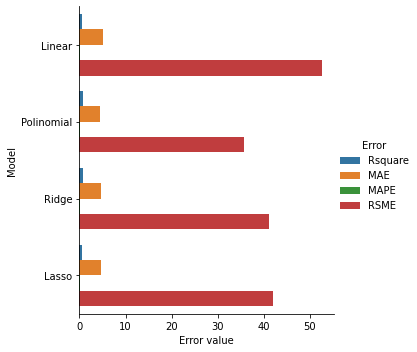

In [160]:
unpivot = pd.melt(
    error_table_df,
    id_vars="Error",
    var_name="Model",
    value_name="Error value")

sns.catplot(data=unpivot, x="Error value", y="Model", hue='Error', kind="bar")
plt.show()

#Ejercicio 2-Regresión múltiple -Casas
Realiza la regresión polinomial de los siguientes datos:

In [161]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2734,2260000340,20141115T000000,700000.0,4,1.75,2340,9100,1.0,0,0,...,8,1610,730,1975,0,98052,47.6401,-122.108,2470,11000
15762,452001310,20140825T000000,500000.0,2,1.00,960,5000,1.0,0,0,...,7,960,0,1900,0,98107,47.6755,-122.367,1330,5000
2168,8029740060,20150507T000000,345000.0,5,2.75,1940,4182,1.0,0,0,...,7,1240,700,2002,0,98056,47.4911,-122.170,1950,4182
5843,871001611,20140701T000000,616000.0,4,1.75,1700,5846,1.0,0,0,...,8,1700,0,1957,0,98199,47.6539,-122.408,1480,5177
8628,823069044,20150325T000000,833450.0,5,4.00,4460,269345,2.0,0,4,...,9,3330,1130,1996,0,98027,47.4992,-122.060,2670,115434
9812,9265200060,20141007T000000,650000.0,6,4.50,3900,9100,2.0,0,0,...,8,2870,1030,1979,0,98052,47.6612,-122.137,2080,9216
12984,9320900610,20141231T000000,146000.0,3,1.00,900,4770,1.0,0,0,...,6,900,0,1969,2009,98023,47.3038,-122.362,900,3480
3383,8807900236,20141219T000000,430000.0,1,1.00,630,1362,1.0,0,0,...,7,630,0,1943,0,98109,47.6342,-122.342,1090,1376
21433,259500230,20141218T000000,465750.0,3,2.50,2670,4534,2.0,0,0,...,9,2670,0,2007,0,98056,47.5100,-122.184,3040,5079
18227,820079101,20141222T000000,525000.0,3,2.25,2040,435600,2.0,0,2,...,7,2040,0,1983,0,98022,47.2328,-121.945,2020,223027


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [163]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [164]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


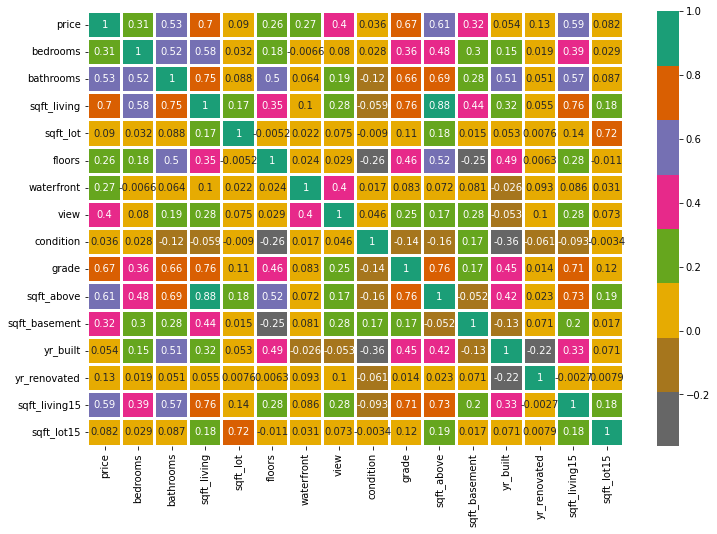

In [165]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [166]:
columns = df.columns.drop('price')

features1 = columns
label = ['price']

X1 = df[features1]
y = df[label]

In [167]:
#Variables con más correlación para acortar los modelos:
features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15']
X = df[features]

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 4)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 4)


#Regresion Lineal

In [169]:
from sklearn.linear_model import LinearRegression

lre=LinearRegression() 

In [170]:
## Aqui entreno al modelo, le doy X train para que me calcule Y train
lre.fit(X_train, y_train)

LinearRegression()

In [201]:
lre.intercept_

array([-640856.06504845])

In [202]:
lre.coef_

array([[ 2.25280604e+02,  1.05048977e+05, -8.49539120e+01,
         2.99770824e+01]])

In [171]:
#Luego hago predicciones con data de entrenamiento -Pruebo mi modelo con datos de entrenamiento
yhat_train = lre.predict(X_train)
yhat_train[0:5]

array([[1029387.30152402],
       [1221291.54884756],
       [ 902506.74605382],
       [ 870063.71871277],
       [ 826926.37409387]])

In [172]:
#Luego hago predicciones con data de validacion - pruebo mi modelo con datos de validacion
yhat_test = lre.predict(X_test)
yhat_test[0:5]

array([[289793.13508073],
       [596829.39536277],
       [594718.5663363 ],
       [481415.14339571],
       [378894.08006355]])

In [173]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

RLRsquare =r2_score(y_test, yhat_test)
RLMAE=  mean_absolute_error(y_test, yhat_test)
RLMAPE= mean_absolute_percentage_error(y_test, yhat_test)
RLRMSE = mean_squared_error (y_test, yhat_test,squared=True)


print(RLRsquare, ': R^2')
print(RLMAE, ': MAE Mean absolute error')
print(RLMAPE, ': MAPE mean absolute percentage error')
print(RLRMSE, ': RMSE root mean squared error')


0.5434354191181658 : R^2
159798.424665685 : MAE Mean absolute error
0.3228621668714207 : MAPE mean absolute percentage error
71931001465.66246 : RMSE root mean squared error


#Regresion Polinomial

In [174]:
pr = PolynomialFeatures(degree=3)
x_train_pr = pr.fit_transform(X_train)
x_test_pr = pr.fit_transform(X_test)
pr

PolynomialFeatures(degree=3)

In [175]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)


LinearRegression()

In [203]:
poly.intercept_

array([66727.84890124])

In [204]:
poly.coef_

array([[-3.20166416e-01,  2.16169004e+01,  1.60732590e+05,
         6.41597544e+01, -4.65939174e+02, -3.23811315e-01,
         6.53184891e+01,  6.61233724e-01, -8.41732620e-02,
        -3.98098449e+04, -8.11534104e+01,  1.11225238e+02,
        -3.00111639e-01, -2.15785494e-02,  1.09976809e-01,
         4.76827751e-05,  4.76419942e-02, -2.35750800e-04,
        -4.31284444e-05, -1.34493698e+01, -7.05120045e-02,
         3.65453812e-02,  3.32324672e-04,  6.56805011e-05,
        -2.23964363e-05,  3.36631047e+03,  1.55826959e+01,
        -1.07073762e+01,  1.21615285e-02, -1.34128067e-02,
        -7.00140388e-03, -1.44923518e-04,  1.77667159e-05,
        -5.07191472e-05,  2.65232173e-05]])

In [176]:
yhat = poly.predict(x_test_pr)


In [177]:
PolyRsquare =r2_score(y_test, yhat)
PolyMAE=  mean_absolute_error(y_test, yhat)
PolyMAPE= mean_absolute_percentage_error(y_test, yhat)
PolyRMSE = mean_squared_error (y_test, yhat,squared=True)


print(PolyRsquare, ': R^2')
print(PolyMAE, ': MAE Mean absolute error')
print(PolyMAPE, ': MAPE mean absolute percentage error')
print(PolyRMSE, ': RMSE root mean squared error')


0.6891869868771305 : R^2
142943.0212294118 : MAE Mean absolute error
0.2909778700418441 : MAPE mean absolute percentage error
48968080833.83595 : RMSE root mean squared error


#Regresion Ridge

In [178]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

In [179]:
parameters1= [{'alpha': [0.000001,0.001,0.0001,0.01,0.1,1,5, 10,19, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [1e-06,
   0.001,
   0.0001,
   0.01,
   0.1,
   1,
   5,
   10,
   19,
   100,
   1000,
   10000,
   100000,
   100000]}]

In [180]:
RR=Ridge()
RR

Ridge()

In [181]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [182]:
Grid1.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [1e-06, 0.001, 0.0001, 0.01, 0.1, 1, 5, 10,
                                    19, 100, 1000, 10000, 100000, 100000]}])

In [183]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=1e-06)

In [184]:
pr = PolynomialFeatures(degree=3)
x_train_pr = pr.fit_transform(X_train)
x_test_pr = pr.fit_transform(X_test)
pr

PolynomialFeatures(degree=3)

In [185]:
RidgeModel=Ridge(alpha=0.000001)

In [186]:
RidgeModel.fit(x_train_pr, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.05053e-33): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge(alpha=1e-06)

In [205]:
RidgeModel.intercept_

array([66727.46273537])

In [206]:
RidgeModel.coef_

array([[ 0.00000000e+00,  2.16180136e+01,  1.60732173e+05,
         6.41590930e+01, -4.65938548e+02, -3.23811546e-01,
         6.53182852e+01,  6.61234214e-01, -8.41733187e-02,
        -3.98098051e+04, -8.11532677e+01,  1.11225292e+02,
        -3.00111756e-01, -2.15787577e-02,  1.09976741e-01,
         4.76828150e-05,  4.76420111e-02, -2.35750840e-04,
        -4.31284687e-05, -1.34493630e+01, -7.05120229e-02,
         3.65453751e-02,  3.32324713e-04,  6.56805058e-05,
        -2.23964195e-05,  3.36630830e+03,  1.55826997e+01,
        -1.07073782e+01,  1.21615205e-02, -1.34128080e-02,
        -7.00140119e-03, -1.44923543e-04,  1.77667189e-05,
        -5.07191550e-05,  2.65232158e-05]])

In [187]:
yhat = RidgeModel.predict(x_test_pr)

In [188]:
RidgeRsquare =r2_score(y_test, yhat)
RidgeMAE=  mean_absolute_error(y_test, yhat)
RidgeMAPE= mean_absolute_percentage_error(y_test, yhat)
RidgeRMSE = mean_squared_error (y_test, yhat,squared=True)


print(RidgeRsquare, ': R^2')
print(RidgeMAE, ': MAE Mean absolute error')
print(RidgeMAPE, ': MAPE mean absolute percentage error')
print(RidgeRMSE, ': RMSE root mean squared error')

0.6891871144944977 : R^2
142943.02782334556 : MAE Mean absolute error
0.2909777905445845 : MAPE mean absolute percentage error
48968060727.92893 : RMSE root mean squared error


#Regresion con Lasso

In [189]:
parameters1= [{'alpha': [0.00001,0.001,0.01,0.1,0.2,0.4,1]}]
parameters1

[{'alpha': [1e-05, 0.001, 0.01, 0.1, 0.2, 0.4, 1]}]

In [190]:
LS=Lasso()
LS

Lasso()

In [191]:
Grid2 = GridSearchCV(LS, parameters1,cv=4)

In [192]:
Grid2.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid=[{'alpha': [1e-05, 0.001, 0.01, 0.1, 0.2, 0.4, 1]}])

In [193]:
BestLS=Grid2.best_estimator_
BestLS

Lasso(alpha=1e-05)

In [194]:
pr = PolynomialFeatures(degree=3)
x_train_pr = pr.fit_transform(X_train)
x_test_pr = pr.fit_transform(X_test)
pr

PolynomialFeatures(degree=3)

In [195]:
LassoModel=Lasso(alpha=0.00001)

In [196]:
LassoModel.fit(x_train_pr, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.884e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=1e-05)

In [208]:
LassoModel.intercept_

array([252265.89933647])

In [207]:
LassoModel.coef_

array([ 0.00000000e+00, -1.94969307e+02, -5.07788692e+03,  1.27905736e+02,
       -4.06271596e+01, -2.70408180e-02,  2.92906830e+01,  3.80913017e-02,
        2.04002471e-02, -3.25867202e+03, -9.25205971e+00, -6.20452685e+00,
       -4.13603026e-02, -3.30298654e-03,  6.66024772e-02, -9.49492778e-06,
        6.59543436e-03,  7.06210426e-06,  3.33243983e-06, -7.87179361e-02,
        2.38492650e-03,  7.78447302e-05, -2.26759661e-06,  1.28232524e-05,
       -2.05211003e-05,  9.66666613e+02, -1.34183660e+00, -1.24060777e+00,
       -2.65326314e-03,  1.00702183e-03, -1.63328536e-03, -3.19642906e-06,
        1.68541907e-05, -3.46137676e-05,  2.01784265e-05])

In [197]:
yhat = LassoModel.predict(x_test_pr)

In [198]:
LassoRsquare =r2_score(y_test, yhat)
LassoMAE=  mean_absolute_error(y_test, yhat)
LassoMAPE= mean_absolute_percentage_error(y_test, yhat)
LassoRMSE = mean_squared_error (y_test, yhat,squared=True)


print(LassoRsquare, ': R^2')
print(LassoMAE, ': MAE Mean absolute error')
print(LassoMAPE, ': MAPE mean absolute percentage error')
print(LassoRMSE, ': RMSE root mean squared error')

0.6818693208256488 : R^2
143367.5394006658 : MAE Mean absolute error
0.29108859132905607 : MAPE mean absolute percentage error
50120967127.50709 : RMSE root mean squared error


In [199]:
error_table = {    'Error' : ['Rsquare',  'MAPE'],
    'Linear' : [RLRsquare,  RLMAPE],
    'Polinomial' : [PolyRsquare,  PolyMAPE],
    'Ridge' : [RidgeRsquare, RidgeMAPE],
    'Lasso' : [LassoRsquare,  LassoMAPE]}

error_table_df = pd.DataFrame(error_table)
error_table_df

,Error,Linear,Polinomial,Ridge,Lasso
0,Rsquare,0.543435,0.689187,0.689187,0.681869
1,MAPE,0.322862,0.290978,0.290978,0.291089


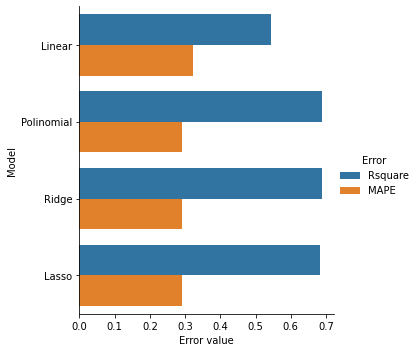

In [200]:
unpivot = pd.melt(
    error_table_df,
    id_vars="Error",
    var_name="Model",
    value_name="Error value")

sns.catplot(data=unpivot, x="Error value", y="Model", hue='Error', kind="bar")
plt.show()